<a href="https://colab.research.google.com/github/LeadShadow/hw5_data_science/blob/main/Hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.optimize import minimize, leastsq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Для прямоугольной области площадью 1000 м2, примыкающей к прямому участку реки, необходимо построить ограду (причем со стороны реки ограду строить не нужно). При каких размерах области a, b длина ограды будет минимальной? Используйте функцию minimize с параметрами ограничениями bounds и constraints

In [3]:
def f_1(l):
    x, y = l
    return 2 * x + y


m_z3 = minimize(f_1, ([0], [100]), bounds=((0, None), (0, None)), constraints=({'type': 'eq', 'fun': lambda x: x[0] * x[1] - 1000}))
m_z3

     fun: 89.44271919981466
     jac: array([2., 1.])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([22.35957402, 44.72357116])

# Друга частина

In [25]:
a = 0.5
b = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0, t_f = 0,25

t = np.linspace(t_0, t_f, 2000)
y = np.array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00])

In [21]:
def func_s(t):
    return (S_0 * np.exp(-a * t))

In [22]:
def func_l(time):
  return (I_0 + a * S_0 * time) * np.exp((-1) * a * time)

In [23]:
def func_r(time):
  return N - func_s(time) - func_l(time)

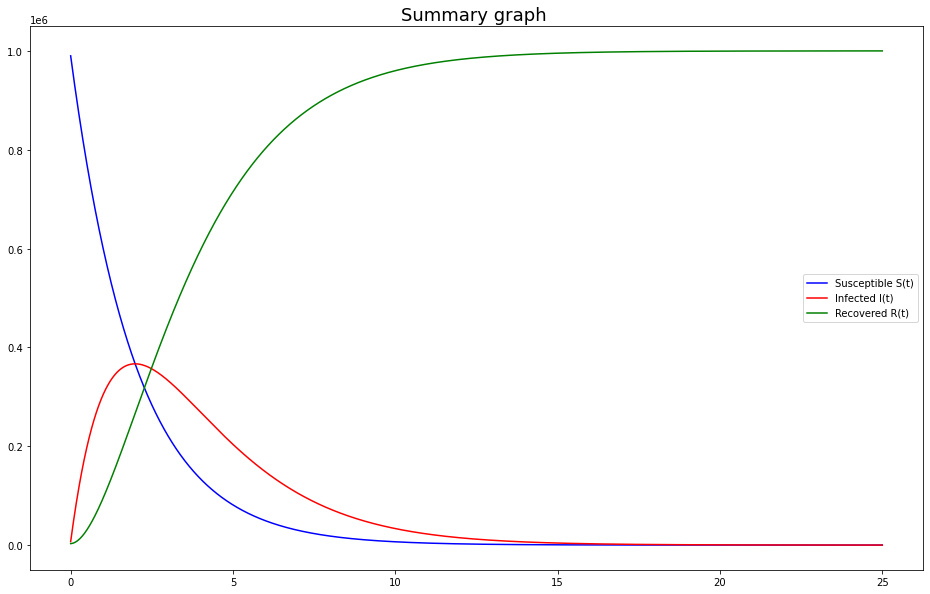

In [26]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.plot(t, func_s(t), 'b', label='Susceptible S(t)')
plt.plot(t, func_l(t), 'r', label='Infected I(t)')
plt.plot(t, func_r(t), 'g', label='Recovered R(t)')
plt.title('Summary graph ', fontsize=18, color='k')
plt.legend()
plt.show()